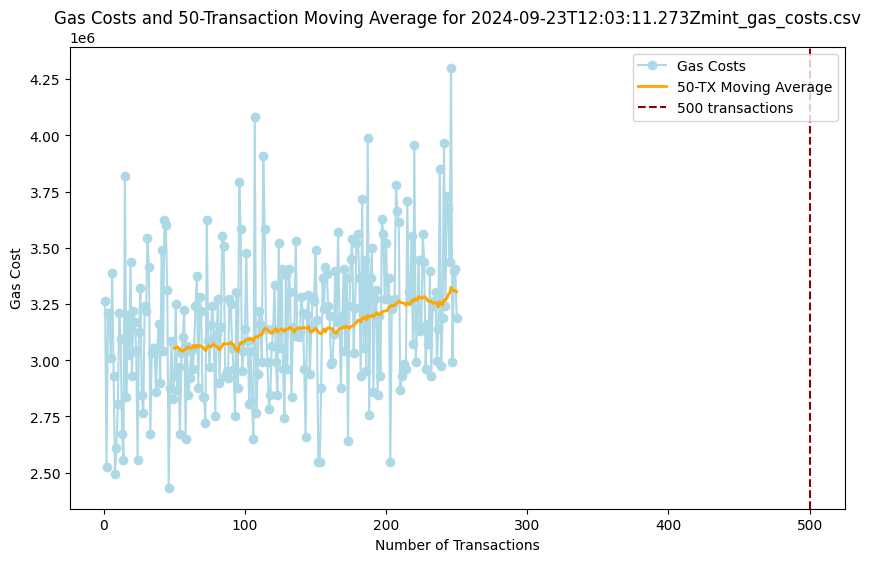

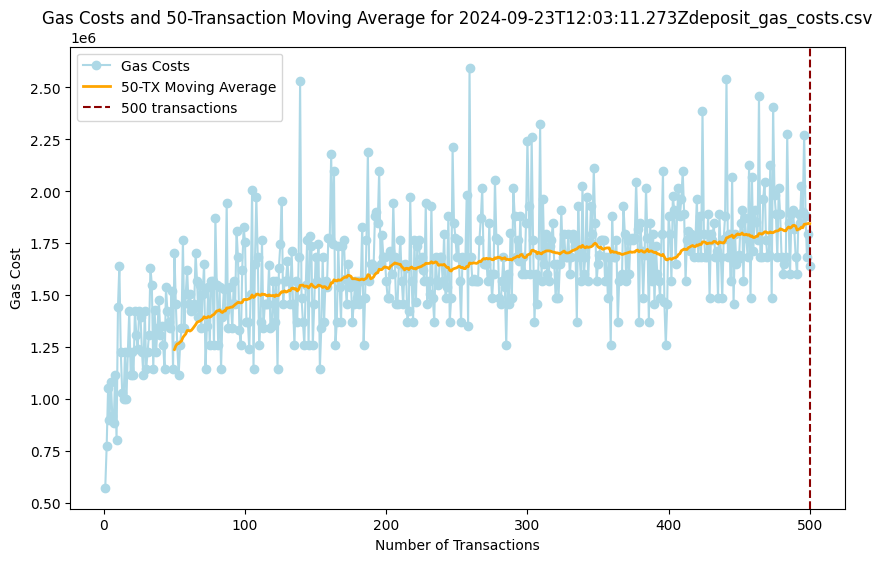

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


folder_path = './'  # update with the actual folder path if using this notebook in a different place
prefix = '2024-09-23T05:02:36.434Z'   # update with specific file prefix that needs to be plotted

window_size = 500   # how many transaction to measure to draw the moving average trend line
threshold_tx = 5000 # highlight area after how many transactions

# find a list of CSV files in the folder with the specified prefix
csv_files = [f for f in os.listdir(folder_path) if f.startswith(prefix) and f.endswith('.csv')]

figures = []

for csv_file in csv_files:
    # read the gas costs from the file
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    gas_costs = df['gas_costs'].tolist()

    # generate transactions index
    transactions = np.arange(1, len(gas_costs) + 1)
    df['transactions'] = transactions

    # calculates the moving average within the defined window
    df['moving_avg'] = df['gas_costs'].rolling(window=window_size).mean()


    # plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['transactions'], df['gas_costs'], label="Gas Costs", color='lightblue', marker='o')
    plt.plot(df['transactions'], df['moving_avg'], label=f"{window_size}-TX Moving Average", color='orange', linewidth=2)

    # create highlight
    plt.axvline(x=threshold_tx, color='darkred', linestyle='--', label=f'{threshold_tx} transactions')
    plt.fill_between(df['transactions'], df['gas_costs'], where=(df['transactions'] > threshold_tx), color='pink', alpha=0.5)

    plt.xlabel('Number of Transactions')
    plt.ylabel('Gas Cost')
    plt.title(f'Gas Costs and {window_size}-Transaction Moving Average for {csv_file}')
    plt.legend()

    # saving the plots as images
    output_file = os.path.join(folder_path, f"{csv_file.replace('.csv', '')}_plot.png")
    plt.savefig(output_file)

    # also store them in the array to display inline
    figures.append(plt.gcf()) 

# display all plots
for fig in figures:
    plt.figure(fig.number)
    plt.show()
